# Lab 5
## A review of ***fun***damentals

I know it feels fast, but we're already halfway through our coursework this quarter. In fact, after this lab we only have one more lab (a multipart one) and then a bonus lab (to help you make up any points you might have lost as we barreled onwards).

As such, we're going to take a bit of a breather this week. We'll focus on some of the **core** ideas of thinking computationally - iteration, flow control, etc. But... *we'll do so through a version of a classic programming problem*.

Additionally, there will be a bit of housekeeping to help you prepare for the coming weeks (namely a check to make sure you have ArcPro and the Arc GIS API for Python working).

Let's start having ***fun*** shall we?*

*(For those wondering, this lab is written in python 3.6)*

### Question One - Drunken Walk


Gosh, I just love those turtles. 
More seriously, I appreciate vector graphics on a (bounded) plane. So let's get underway, shall we?

Oh noes. Our favorite turtle has drunk too much watching his favorite NFL team (the Patriots, obviously; alternatively, if you prefer, our poor turtle can be a time-displaced fan of the [Hartford Whalers](https://www.youtube.com/watch?v=TJtiepwpKFw)).

It is now time for our turtle to (attempt to) stumble home. To do so, you're going to work your way through a version of a classic [random walk](https://en.wikipedia.org/wiki/Random_walk). **I will stress this several times throughout, but: there are many ways to approach this problem, you should focus on the one that *makes sense to you***.

You are going to write a 'simulation' in which our 'turtle' takes up to 500 steps to try to reach home, but does so by following a 'random(ish)' pattern. This isn't a _true_ random walk due to the constraints I am placing, but it will still force you to think through the same ideas (and a few extras!). It's also worth noting it's very unlikely the poor turtle will find their way home within 1,000 steps.

You need to write a script that:
1. Your 'turtle' begins at (-122, 47)
2. Your 'turtle's' home is (-71, 42)

3. Your 'turtle' moves randomly following these rules: The turtle moves **one** step in a **randomly** selected direction. In other words, the initial direction is selected randomly; subsequently, the turtle **randomly** selects to turn to the left 90 degrees, to the right 90 degrees, or continue in the direction last followed and takes another step.

4. The plane is bounded. The walls are at (-180, Y), (180, Y); (X, 90), (X, -90). You can probably guess why, huh?
5. If your turtle walks into the 'wall,' they immediately 'bounce' five pixels backwards and turn around 180 degrees. It then begins walking again. 

7. After 500 steps **or** arriving at (-71, 42), the walk is over (morning has broken). 

8. After the walk, you'll want to know: where the turtle ended up (final location); how far that location is from where it began; how far the turtle is from 'home' (you can use straight line distance here). Print these out.

Now, you do not have to create your own functions and classes for this; however, I strongly recommend it (as things will get more complicated we we go on). 

In [1]:
import turtle
import random
import math

#First, some ground rules
upx = 180
downx = -180

upy = 90
downy = -90

startx = -122
starty = 47

endx = -71
endy = 42

count = 0

#Housekeeping: open screen canvas, define size, set start point
wn = turtle.Screen()
wn.setup(width=720, height=360)  #this sets screen border at double the world coordinates so 1 space is more apparent
wn.reset()
wn.setworldcoordinates(downx, downy, upx, upy) #set bounding coordinates for window, same as plane bounding

#set window title and color
wn.title('Godspeed, little buddy.')
wn.bgcolor('black') #because it is nighttime and whatnot.

#Set up turtle
bob = turtle.Turtle()
bob.pu()

#Mark home, just for reference.
bob.goto(endx, endy)
bob.color('red')
bob.shape('square')
bob.pd()
bob.stamp()
bob.shape('triangle')
bob.left(90)
bob.forward(8)
bob.stamp()
bob.pu()

#Now, to the bar!
bob.goto(startx, starty)
bob.shape('turtle')
bob.color('green')
bob.pd()


#Set function to correct if out of bounds
def outBound(turtle):
    if (turtle.xcor() == upx):
        turtle.setx(turtle.xcor() - 5)
        turtle.left(180)
    if (turtle.xcor() == downx):
        turtle.setx(turtle.xcor() + 5)
        turtle.left(180)   
    if (turtle.xcor() == upy):
        turtle.sety(turtle.ycor() - 5)
        turtle.left(180)
    if (turtle.xcor() == downy):
        turtle.sety(turtle.ycor() + 5)
        turtle.left(180)   

#Pythagorean theorem to calculate linear distance based on dx, dy
def Distance(turtle, x, y):
    return math.sqrt(((x - turtle.xcor())**2)+(y - turtle.ycor())**2)

#Set function to determine direction to move
def getDir(turtle):
    rand = random.randint(0,2)
    if (rand == 0):
        turtle.left(0)
    elif (rand == 1):
        turtle.left(90)
    elif (rand == 2):
        turtle.right(90)

#Choose a reandom direction to start(N, S, E, or W)
rand = random.randint(0,3)
startdir = rand*90
bob.left(startdir)
bob.fd(1)
count = count+1

#Iterate through 500 times and check location, if not home choose random direction and try again.
for i in range(499):
    if (bob.position() == (endx, endy)):   # I was never able to actually test if this worked, could also use distance function
        print ('Bob made it home!')
        break
    else:
        getDir(bob)
        bob.fd(1)
        outBound(bob)
        count = count+1


print('Bob passed out at', bob.pos())        
print('Bob was', round(Distance(bob, endx, endy), 1), 'pixels from home.')
print('He made it', round(Distance(bob, startx, starty), 1), 'pixels from the bar in', count, 'steps.\n')
print('Goodnight, Bob.')

#End on click, if needed
turtle.exitonclick()  




Bob passed out at (-158.00,31.00)
Bob was 87.7 pixels from home.
He made it 205.6 pixels from the bar in 500 steps.

Goodnight, Bob.


### Question Two - Guided Walk


You've probably noticed two things: 
1. Gosh, that takes a long time.
2. The turtle is very unlikely to end up 'home'.

That's **ok**, in fact, it's expected. Let's help our turtle out a bit by making things a little *less* random. We're going to change how our turtle moves in a couple of ways:

1. The turtle now changes directions in 45 degree increments (so it turns left or right 45 instead of 90).
2. The turtle now always moves in the 'right' direction, In other words, before taking each step, the turtle 'checks' to make sure they are not headed away from their home (the distance from 'home' is the same or less than their current location).

How might you do this? There are a few approaches. I might create a function (or method) that compares proposed new location to previous location (checking distance and forcing a new step selection when needed). Remember, steps are *still chosen randomly*, the turtle just stumbles in the right direction.

Note: There is an additional difficulty here where, by turning 45 degrees, the turtle is unable to ever *reach home exactly*. **For this problem, 'home' is considered anywhere within a distance of 1 from (-71, 42).** This should solve the problem.

For this problem, at the end print out: the turtle's final location; the distance the turtle traveled; how many steps the turtle took.

In [1]:
import turtle
import random
import math

#First, some ground rules
upx = 180
downx = -180

upy = 90
downy = -90

startx = -122
starty = 47

endx = -71
endy = 42

count = 0

#Housekeeping: open screen canvas, define size, set start point
wn = turtle.Screen()
wn.setup(width=720, height=360)  #this sets screen border at double the world coordinates so 1 space is more apparent
wn.reset()
wn.setworldcoordinates(downx, downy, upx, upy) #set bounding coordinates for window, same as plane bounding

#set window title and color
wn.title('Godspeed, little buddy.')
wn.bgcolor('black') #because it is nighttime and whatnot.

#Set up turtle
bob = turtle.Turtle()
bob.pu()

#Mark home, just for reference.
bob.goto(endx, endy)
bob.color('red')
bob.shape('square')
bob.pd()
bob.stamp()
bob.shape('triangle')
bob.left(90)
bob.forward(8)
bob.stamp()
bob.pu()

#Now, to the bar!
bob.goto(startx, starty)
bob.shape('turtle')
bob.color('green')
bob.pd()


#Set function to correct if out of bounds
def outBound(turtle):
    if (turtle.xcor() == upx):
        turtle.setx(turtle.xcor() - 5)
        turtle.left(180)
    if (turtle.xcor() == downx):
        turtle.setx(turtle.xcor() + 5)
        turtle.left(180)   
    if (turtle.xcor() == upy):
        turtle.sety(turtle.ycor() - 5)
        turtle.left(180)
    if (turtle.xcor() == downy):
        turtle.sety(turtle.ycor() + 5)
        turtle.left(180)   

#Pythagorean theorem to calculate linear distance based on dx, dy
def Distance(turtle, x, y):
    return math.sqrt(((x - turtle.xcor())**2)+(y - turtle.ycor())**2)

#Set function to determine heading
def getDir(turtle):
    heading = 0
    rand = random.randint(0,2)
    if (rand == 0):
        heading = 45
        return heading
    elif (rand == 1):
        heading = -45
        return heading
    elif (rand == 2):
        return heading
    
#Need a function to see if test move is closer to home
def testMove(turtle, test, heading):
    start = turtle.pos()
    dist = Distance(turtle, endx, endy)
    turtle.pu()
    turtle.left(test)
    turtle.fd(1)
    testdist = Distance(turtle, endx, endy)
    turtle.goto(start)
    turtle.setheading(heading)
    if (testdist < dist):
        return True
    else:
        return False

#Choose a reandom direction to start - now limited to E, SE, and S (0, 45, or 90 degrees right)
rand = random.randint(0,2)
startdir = rand*45
bob.right(startdir)
bob.fd(1)
count = count+1

#Iterate through 500 times and check location, if not home choose random direction and try again.
for i in range(499):
    check = Distance(bob, endx, endy)    
    if (check < 1):  
        print('Bob made it home! \n')
        break
    else:
        #Test move before actual move to see if closer to home
        #The 'else' scenario in this loop 'wastes' an interation of i in range(499),
        #but it takes nowhere near 500 to get home now, so I think it's ok.
        dist = Distance(bob, endx, endy)
        testheading = getDir(bob)
        heading = bob.heading()
        if (testMove(bob, testheading, heading) == True):
            bob.pd()
            bob.left(testheading)
            bob.fd(1)
            outBound(bob)
            count = count+1

print('Bob passed out at', bob.pos())        
print('Bob was', round(Distance(bob, endx, endy), 0), 'pixels from home.')
print('He made it', round(Distance(bob, starty, starty), 0), 'pixels from the bar in', count, 'steps.\n')
print('Goodnight, Bob.')

#End on click, if needed
turtle.exitonclick()  

Bob made it home! 

Bob passed out at (-71.42,41.29)
Bob was 1.0 pixels from home.
He made it 119.0 pixels from the bar in 69 steps.

Goodnight, Bob.


# Housekeeping
## After this extremely important house keeping, there are some bonus questions.

Next week, we take a dive into the ArcGIS API for Python. For all intents and purposes, it and ArcPro are the direction Esri is headed. ArcPy will likely continue to exist for a few more years (and so you need to know it *now*), but it's very clearly being phased out.

You may have wondered why I so strongly encourated using Anaconda and Jupyter Notebooks; well, now you'll find out.
By next week you need to have the ArcGIS API for Python working on your marchines. **By far**, the easiest way to do this is through Anaconda.

You can [go to this page](https://developers.arcgis.com/python/guide/install-and-set-up/) for directions on how to set up the API; however, if you have conda installed, you can do so with the following command (in a virtual environment):

`conda install -c esri arcgis`

That's it.

Once you have it installed, try the following two commands:

In [1]:
from arcgis.gis import GIS
my_gis = GIS()
my_gis.map()
print('test')

test


Test Time!
Logged in as jenninaj_MSGT


<Item title:"Lake Water Quality Data Submission Tool_fieldworker" type:Feature Layer Collection owner:jenninaj_MSGT>

<Item title:"Lake Water Quality Data Submission Tool" type:Feature Layer Collection owner:jenninaj_MSGT>
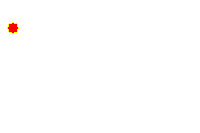

<Item title:"Sasquatch" type:Feature Layer Collection owner:jenninaj_MSGT>
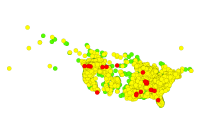

<Item title:"Volunteer_Lake_WQ_Data" type:Feature Layer Collection owner:jenninaj_MSGT>
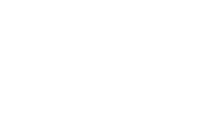

In [4]:
from arcgis.gis import GIS

print('Test Time!')
gis = GIS('https://uwt-gis-geotech.maps.arcgis.com', 'jenninaj_MSGT', '{PASSWORD}') #your AGOL username and password go here
print('Logged in as ' + str(gis.properties.user.username))

mysearch = gis.content.search(query='owner: jenninaj_MSGT', item_type='Feature Layer') #your AGOL username goes here (I used Kevin's in this demo)
for i in mysearch:
    display(i)

## If those two cells ran correctly, congratulations - you are ready for next week.

# IF YOU UPLOAD A FILE WITH YOUR PASSWORD IN IT, YOU WILL LOSE 2 POINTS.

## Bonus Points

Ok, for the record, having a vector 'draw' each step of a random walk is highly inefficient. You could just as easily create a mathematical matrix and have your 'turtle' move across that. Doing so would be much, much faster and allow for you to run simulations of 1,000+ steps thousands of times. 

Similarly, as you saw in the second part of the question (the guided turtle), you can put constraints on movement. These need not be distance related; instead, you might set it so certain locations were impassable or that the 'turtle' has to move along a given grid (such as streets).

Aha, you might be thinking, this would be one way to model movement! And, indeed, you are correct.
But, let's get to some more fun silliness for now.

### Bonus Question 1 - Turtles on a Map (+1-3 pts)

You might have guessed why the boundaries are set where they are, I was having you mimic latitude and longitude coordinates. You might note that I was doing so ***without*** allowing your turtle to wrap around the edges as would happen on an actual globe. We'll get to that in a moment.

For now, let's just put our drunken turtle on a map.
1. Transform your turtle's guided path (question 2) into a shapefile. (+1 pts)
2. Display your turtle's guided path (question 2) on a leaflet map (use Folium, +2 pts)

For part two, you might want to use geopandas to create and manipulate geoJSON (You would install geopandas and folium into the virtual environment you are using just like normal).

### Bonus Question 2 - A turtle road trip. (+2-4 pts)

If you completed the previous bonus question, you've now realized that our drunken turtle friend is stumbling roughly from Tacoma to Boston. Now, let's see if our turtle stopped by any other major cities along the way.

You'll find the file 500_cities.csv [in this repo](https://github.com/UWTMGIS/TGIS501_Files). It's a pretty straitforward list of 500 cities, their populations, and their (approximate) latitude and longitude location.

You are going to create map that displays:
1. The path that your turtle took on its guided wander (as a line)
2. All cities in 500_cities.csv which your turtle came within 50 miles of **and** with populations over 10,000. (as a point file)

In other words, your map will show the path your turtle took and all of the cities which meet the above requirements.
Note: I specified a distance in miles, but everything was previously in lat/long. Make sure you handle this (projections matter!).

+2 pts as a shapefile
+4 pts as a leaflet slippy map (use Folium)
